   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  
         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.

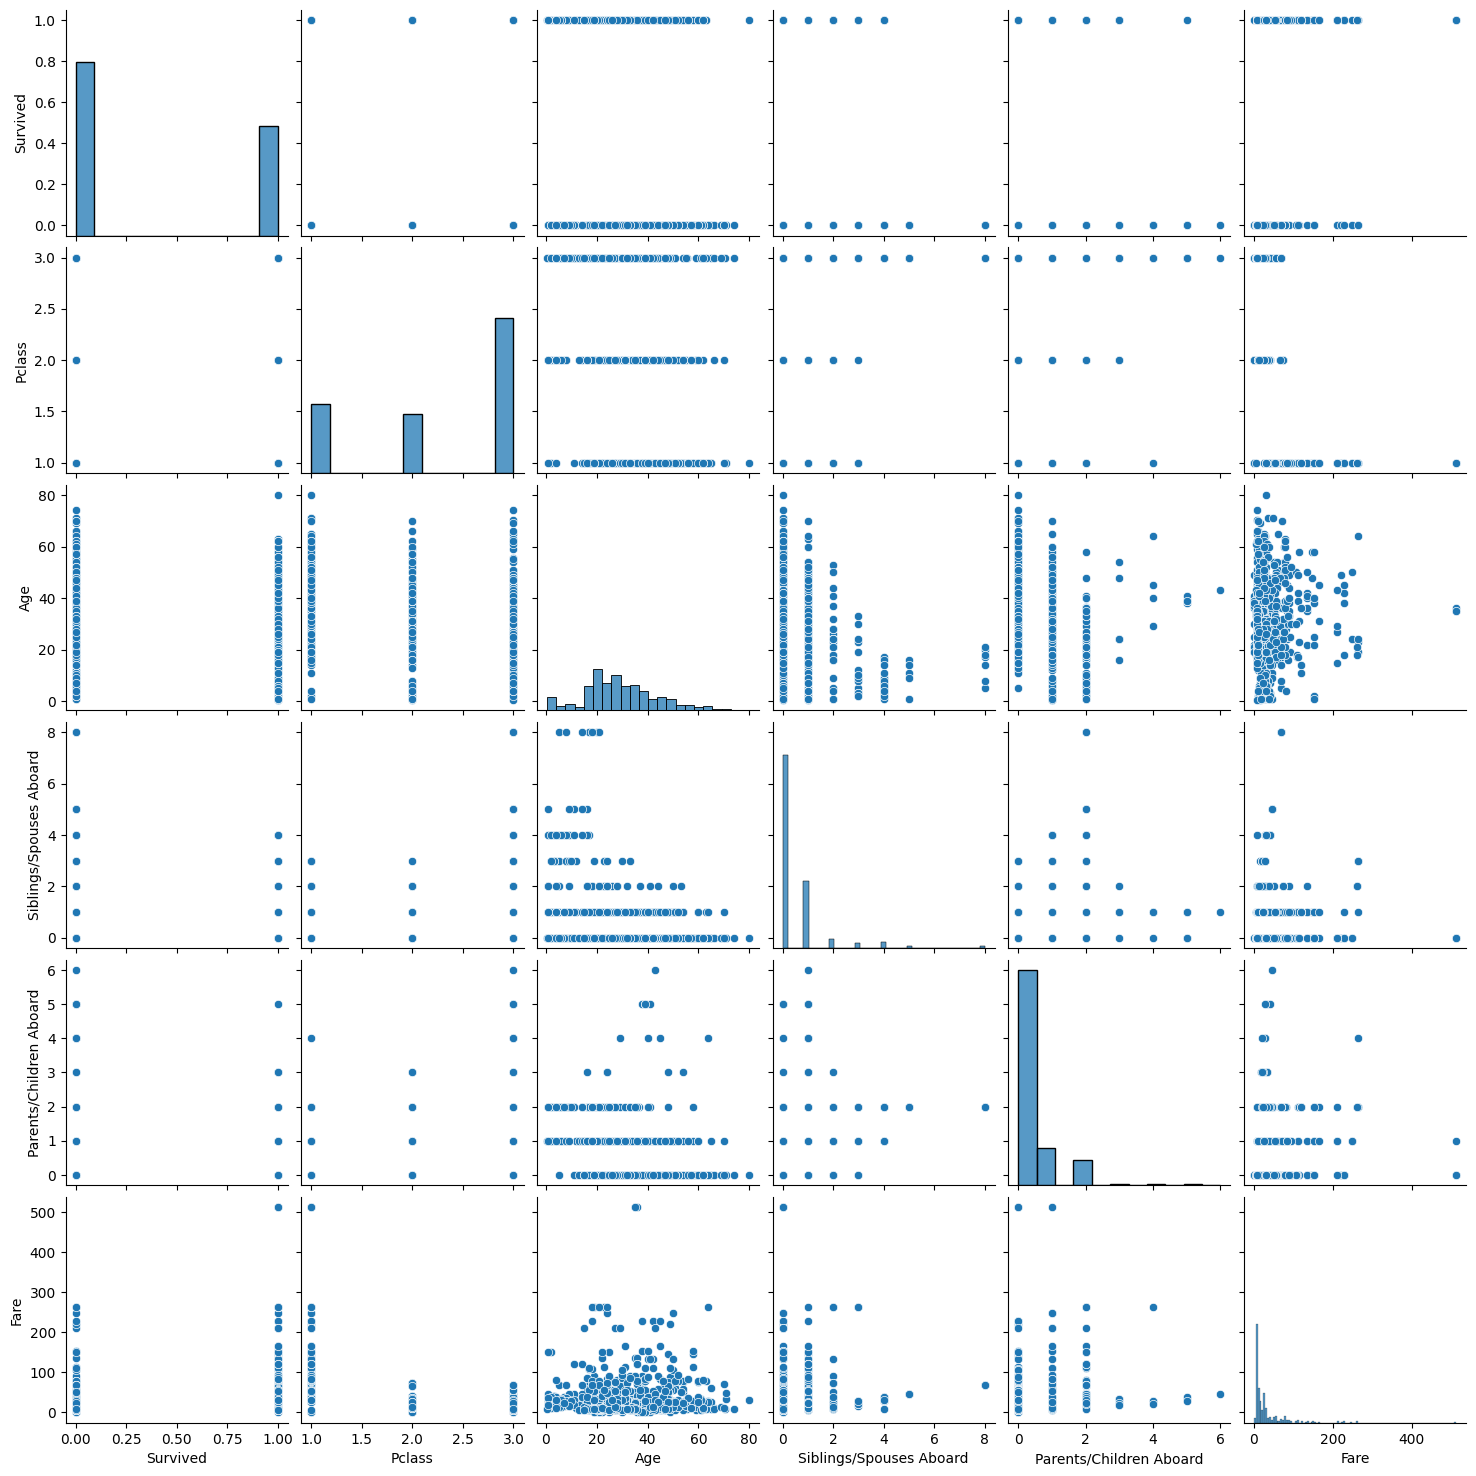

In [2]:
import pandas as pd
import seaborn as sns

# Pulling the Titanic dataset into a dataframe
titanic_df = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

# Exploratory Data Analysis
print(titanic_df.head())
print(titanic_df.describe())
sns.pairplot(titanic_df)

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [6]:
# Detecting outliers in the data
numeric_cols = titanic_df.select_dtypes(include='number').columns
Q1 = titanic_df[numeric_cols].quantile(0.25)
Q3 = titanic_df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
print(((titanic_df[numeric_cols] < (Q1 - 1.5 * IQR)) | (titanic_df[numeric_cols] > (Q3 + 1.5 * IQR))).sum())


Survived                     0
Pclass                       0
Age                         13
Siblings/Spouses Aboard     46
Parents/Children Aboard    213
Fare                       116
dtype: int64


In [9]:
titanic_df[titanic_df["Age"] > Q3["Age"] + 1.5 * IQR["Age"]]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
33,0,2,Mr. Edward H Wheadon,male,66.0,0,0,10.5000
53,0,1,Mr. Engelhart Cornelius Ostby,male,65.0,0,1,61.9792
95,0,1,Mr. George B Goldschmidt,male,71.0,0,0,34.6542
115,0,3,Mr. Patrick Connors,male,70.5,0,0,7.7500
278,0,3,Mr. Frank Duane,male,65.0,0,0,7.7500
453,0,1,Mr. Francis Davis Millet,male,65.0,0,0,26.5500
490,0,1,Mr. Ramon Artagaveytia,male,71.0,0,0,49.5042
508,0,3,Mr. James Webber,male,66.0,0,0,8.0500
535,0,3,Mr. Samuel Beard Risien,male,69.0,0,0,14.5000
627,1,1,Mr. Algernon Henry Wilson Barkworth,male,80.0,0,0,30.0000


## 2nd Experiment

> write some code to download the titanic dataset to a dataframe and perform EDA also detect outliers for numeric data data types

In [10]:
import pandas as pd
import seaborn as sns

# Downloading the Titanic dataset
titanic_df = sns.load_dataset('titanic')

# Performing EDA
print(titanic_df.head())
print(titanic_df.describe())

# Detecting outliers for numeric data types
numeric_cols = titanic_df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    q1 = titanic_df[col].quantile(0.25)
    q3 = titanic_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = titanic_df[(titanic_df[col] < lower_bound) | (titanic_df[col] > upper_bound)]
    print(f"Outliers for {col}:")
    print(outliers)

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.3815